In [13]:
###Importing all the required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborninstance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [4]:
df = pd.read_csv('Med_nhanes.csv') ## loading the data and then read the data

In [15]:
df.head() #first five data structure

,Age,BMI,Pulse
0,47,23.79,70
1,24,25.65,62
2,32,44.40,68
3,5,16.70,72
4,7,25.00,72


In [38]:
## Understanding the X and Y variables
X = df['BMI'].values.reshape(-1,1)
y = df['Pulse'].values.reshape(-1,1)

In [132]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [133]:
y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (70, 1) (70,)
Testing dataset shape: (30, 1) (30,)


In [134]:
# Build RF classifier to use in feature selection
clf1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [135]:
# Build step forward feature selection
sfs1 = sfs(clf1,
           k_features=1,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [136]:
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished

[2024-02-11 20:31:09] Features: 1/1 -- score: 0.27142857142857146

In [137]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0]


In [138]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.614
Testing accuracy on selected features: 0.133


In [139]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on all features: 0.614
Testing accuracy on all features: 0.133


In [144]:
y_test_pred = clf.predict(X_test)

In [145]:
y_test_pred

array([72, 72, 78, 72, 72, 72, 72, 78, 74, 72, 64, 88, 72, 72, 72, 72, 72,
       66, 72, 88, 72, 72, 78, 72, 66, 72, 64, 72, 72, 78])

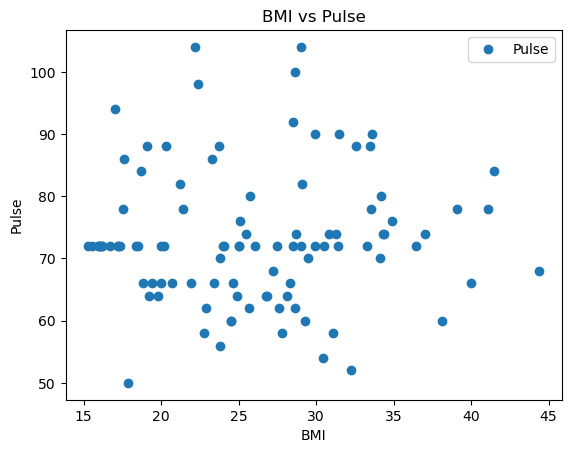

In [146]:
##Plotting the data
df.plot(x = 'BMI', y  = 'Pulse', style = 'o')
plt.title('BMI vs Pulse')
plt.xlabel('BMI')
plt.ylabel('Pulse')
plt.show()

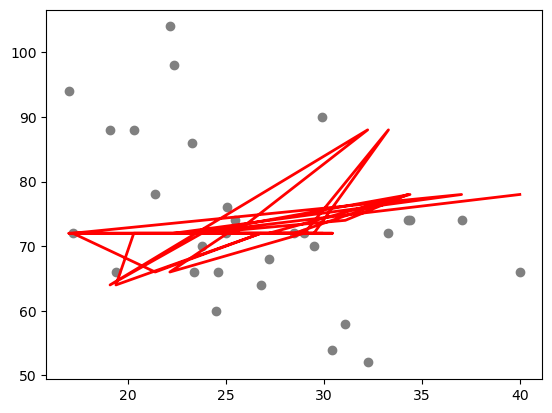

In [147]:
##Plotting out the random forest 
plt.scatter (X_test, y_test, color = 'gray')
plt.plot(X_test, clf.predict(X_test), color = 'red', linewidth =2)
plt.show()
